In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(2)) 

        name mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
0  100%_Bran   N    C        70        4    1     130   10.0    5.0       6   
1   All-Bran   K    C        70        4    1     260    9.0    7.0       5   

   potass  vitamins  shelf  weight  cups     rating  
0     280        25      3     1.0  0.33  68.402973  
1     320        25      3     1.0  0.33  59.425505  


In [2]:
dfnew = df[['calories','fat','fiber','sugars']]
# with and without rating

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


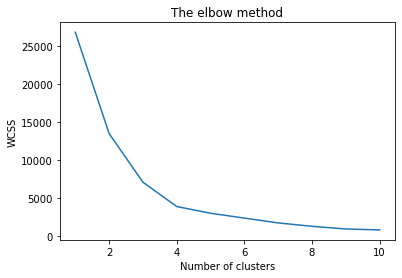

In [3]:
#Finding the optimum number of clusters for k-means classification - ELBOW METHOD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfnew)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [4]:
from sklearn.cluster import KMeans
# cluster 4 or 8 
kmeans = KMeans(n_clusters=4)

kmeans.fit(dfnew)
y_kmeans = kmeans.predict(dfnew)

In [5]:
y_kmeans

array([3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       0, 2, 0, 1, 2, 0, 2, 0, 3, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 2, 0, 1, 1, 0, 0, 1])

In [6]:
#dfnew.head()
df3 = dfnew.assign(clusterNo = y_kmeans, namex = df['name'])
print(df3.head())

   calories  fat  fiber  sugars  clusterNo                      namex
0        70    1   10.0       6          3                  100%_Bran
1        70    1    9.0       5          3                   All-Bran
2        50    0   14.0       0          3  All-Bran_with_Extra_Fiber
3       110    3    4.0       7          1         Cracklin'_Oat_Bran
4       120    1    6.0      14          1      Post_Nat._Raisin_Bran


In [7]:
from pandasql import sqldf
print(sqldf("select namex,clusterno,calories from df3 order by clusterno"))


                        namex  clusterNo  calories
0                   Bran_Chex          0        90
1                 Bran_Flakes          0        90
2                 Corn_Flakes          0       100
3      Cream_of_Wheat_(Quick)          0       100
4      Crispy_Wheat_&_Raisins          0       100
..                        ...        ...       ...
69                  100%_Bran          3        70
70                   All-Bran          3        70
71  All-Bran_with_Extra_Fiber          3        50
72                Puffed_Rice          3        50
73               Puffed_Wheat          3        50

[74 rows x 3 columns]


In [8]:
print(sqldf("select namex,clusterno,calories from df3 where clusterno=3"))

                       namex  clusterNo  calories
0                  100%_Bran          3        70
1                   All-Bran          3        70
2  All-Bran_with_Extra_Fiber          3        50
3                Puffed_Rice          3        50
4               Puffed_Wheat          3        50


In [9]:
# OTHER TECH: HIERACHICAL DENDROGRAM

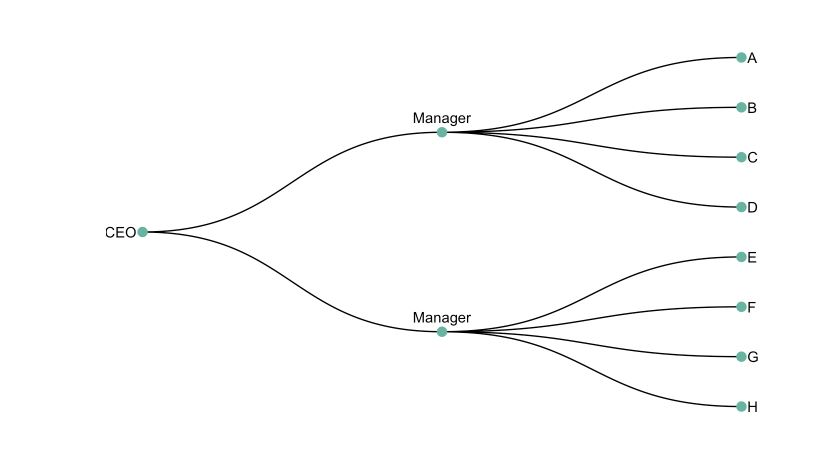

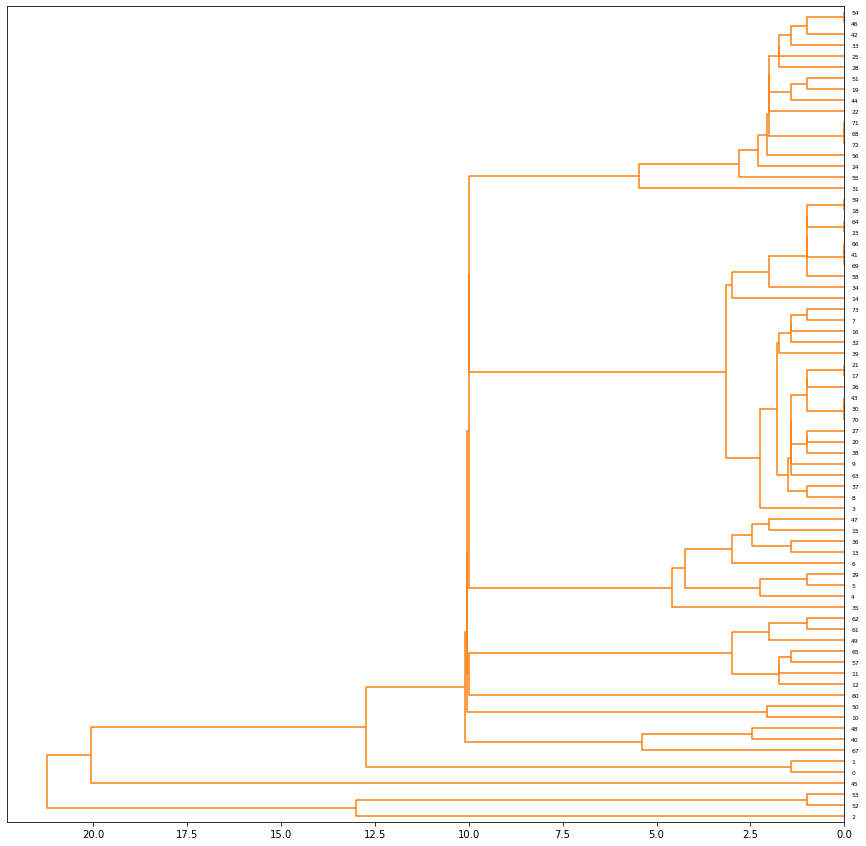

In [10]:
# OTHER TECH: HIERACHICAL DENDROGRAM
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

#df = df.set_index('name')
#del df.index.name
linked = linkage(dfnew, 'single')
#linked
#print(type(linked))
plt.figure(figsize=(15, 15))  
zx = dendrogram(linked, orientation='left',labels=df.index, color_threshold=60, above_threshold_color='red')
plt.show()

# index Number at Leaf
#df = df.set_index('name')
#del df.index.name

In [11]:
#zx
# ICORD, DCORD, ivl, leaves, color_list, leaves_color_list'
#zx[color_list] 
#type(zx)  # dict
#zx['leaves_color_list']

In [12]:
#linked  # -- Explain

# The linkage matrix LINKED represents a dendrogram

#A  by 4 matrix Z is returned. 
#At the -th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster .
#A cluster with an index less than  corresponds to one of the  original observations. 
#The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. 
#The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [13]:
# Filter numpy ndarray (matrix) according to column values : Stackoverflow

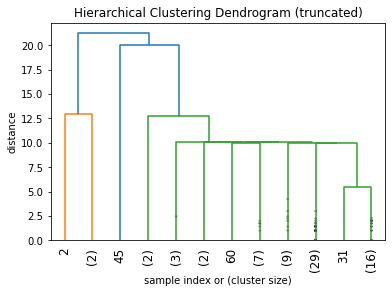

In [14]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
#Z = dendrogram(linked, orientation='left',labels=df.index, color_threshold=60, above_threshold_color='red')
dendrogram(
    linked,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

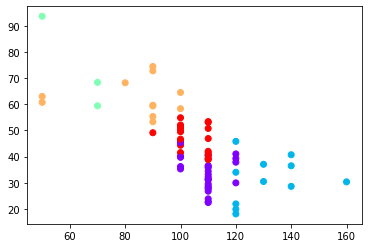

In [15]:

from sklearn.cluster import AgglomerativeClustering
import matplotlib as mpl

#Scaling of data
dfnew2 = df[['calories','fat','fiber','sugars','rating']]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = dfnew2
xScale = ss.fit_transform(x)

#xScale


cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(xScale)
fig, ax = plt.subplots()
#x.iloc[:,0]
#print(x)
ax.scatter(x.iloc[:,0],x.iloc[:,4], c=cluster.labels_, cmap='rainbow')

In [16]:
# METRICS

#Elbow method
#Silhouette analysis

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


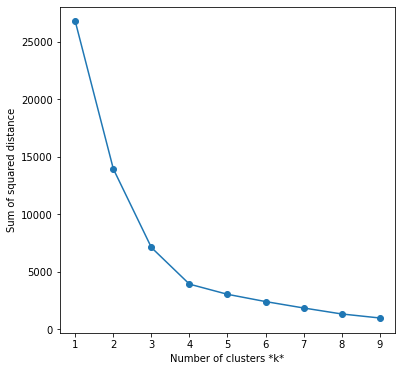

In [17]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(dfnew)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [18]:
# Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:

In [19]:
kmeans.fit(dfnew)

KMeans(n_clusters=4)

In [20]:
# silhouette_score
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10]
#range_n_clusters = list (range(2,100))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfnew)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dfnew, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.656185158213124)
For n_clusters = 3, silhouette score is 0.5832403037481728)
For n_clusters = 4, silhouette score is 0.5203582892347008)
For n_clusters = 5, silhouette score is 0.5052793597370216)
For n_clusters = 6, silhouette score is 0.5126991752107398)
For n_clusters = 7, silhouette score is 0.5417383636995573)
For n_clusters = 8, silhouette score is 0.560141666311264)
For n_clusters = 9, silhouette score is 0.567976461438445)
For n_clusters = 10, silhouette score is 0.5774047840906135)


In [21]:
# ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

In [23]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}


# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dfnew)
    score = silhouette_score(dfnew, kmeans.labels_)
    silhouette_coefficients.append(score)

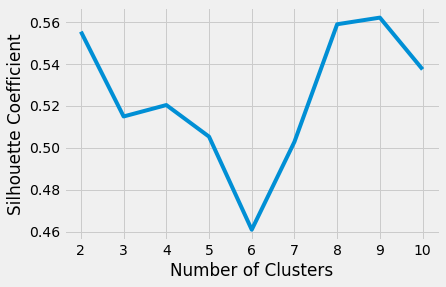

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()